1 - Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pmdarima.arima import auto_arima
from arch import arch_model
import pickle
sns.set()

2 - Load Dataset

In [2]:
df = pd.read_csv("stock-indexes-preprocessed.csv")
df.head()

,date,bse,spx,ftse,dax,nikkei
0,2000-01-05,-2.440530,0.192218,-1.950224,-1.288614,-2.422312
1,2000-01-06,1.204588,0.095568,-1.357115,-0.417558,-2.018499
2,2000-01-07,-0.130033,2.709040,0.893405,4.726546,0.138377
3,2000-01-10,1.919116,1.118997,1.581915,2.131852,0.000000
4,2000-01-11,-4.024549,-1.306251,-1.343891,-0.494837,3.614000


In [3]:
df = df.set_index("date")
df.index = pd.to_datetime(df.index)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

3 - Splitting Dataset

In [4]:
start_date = "2000-01-05"
train_date = "2020-12-07"
end_date = "2022-05-31"

In [5]:
df_train, df_test = df.loc[:train_date], df.loc[train_date:]

In [6]:
df_train.head()

,bse,spx,ftse,dax,nikkei
date,,,,,
2000-01-05,-2.440530,0.192218,-1.950224,-1.288614,-2.422312
2000-01-06,1.204588,0.095568,-1.357115,-0.417558,-2.018499
2000-01-07,-0.130033,2.709040,0.893405,4.726546,0.138377
2000-01-10,1.919116,1.118997,1.581915,2.131852,0.000000
2000-01-11,-4.024549,-1.306251,-1.343891,-0.494837,3.614000


In [7]:
df_train.tail()

,bse,spx,ftse,dax,nikkei
date,,,,,
2020-12-01,1.145472,1.127119,1.891098,0.685716,1.338901
2020-12-02,-0.083758,0.179117,1.232630,-0.516052,0.050178
2020-12-03,0.032743,-0.062416,0.416188,-0.453533,0.031300
2020-12-04,1.001290,0.883628,0.922922,0.347846,-0.216823
2020-12-07,0.770678,-0.193564,0.079382,-0.210242,-0.761837


In [8]:
df_test.head()

,bse,spx,ftse,dax,nikkei
date,,,,,
2020-12-07,0.770678,-0.193564,0.079382,-0.210242,-0.761837
2020-12-08,0.399637,0.278715,0.051864,0.056441,-0.302701
2020-12-09,1.085298,-0.794920,0.083857,0.465185,1.325644
2020-12-10,-0.311519,-0.128511,0.540804,-0.333796,-0.230067
2020-12-11,0.302727,-0.126500,-0.803055,-1.364578,-0.387651


In [9]:
df_test.tail()

,bse,spx,ftse,dax,nikkei
date,,,,,
2022-05-25,-0.561208,0.945076,0.513066,0.633486,-0.262971
2022-05-26,0.936328,1.988326,0.559633,1.594528,-0.273489
2022-05-27,1.165160,2.474226,0.272312,1.622484,0.664691
2022-05-30,1.896847,0.000000,0.192474,0.786811,2.194597
2022-05-31,-0.642509,-0.627437,0.100000,-1.287261,-0.327478


4 - Training and Testing Model - Returns

In [10]:
model = auto_arima(df_train.bse, exogenous=df_train[['spx', 'ftse', 'dax', 'nikkei']])

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5459
Model:               SARIMAX(2, 0, 5)   Log Likelihood               -9144.208
Date:                Wed, 29 Jun 2022   AIC                          18314.416
Time:                        13:47:59   BIC                          18400.281
Sample:                    01-05-2000   HQIC                         18344.377
                         - 12-07-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0373      0.015      2.466      0.014       0.008       0.067
spx            0.0437      0.011      3.976      0.000       0.022       0.065
ftse           0.2720      0.019     14.236      0.000       0.235       0.309
dax            0.0551      0.017      3.244      0.001       0.022       0.088
nikkei         0.2292      0.009     26.227      0.000       0.212       0.246
ar.L1          0.7923      0.054     14.604      0.000       0.686       0.899
ar.L2         -0.7046      0.052    -13.550      0.000      -0.806      -0.603
ma.L1         -0.8193      0.054    -15.082      0.000      -0.926      -0.713
ma.L2          0.6927      0.053     13.140      0.000       0.589       0.796
ma.L3         -0.0409      0.013     -3.165      0.002      -0.066      -0.016
ma.L4          0.0537      0.012      4.465      0.000       0.030       0.077
ma.L5         -0.0999      0.009    -10.986      0.000      -0.118      -0.082
sigma2         1.6690      0.015    113.112      0.000       1.640       1.698
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             25179.15
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
df_test_pred = pd.DataFrame(model.predict(n_periods = len(df_test[train_date:end_date]),
                            exogenous=df_test[['spx', 'ftse', 'dax', 'nikkei']][train_date:end_date]),
                            index = df_test[train_date:end_date].index)

In [13]:
df_test_pred['bse_target'] = df_test['bse']

In [14]:
df_test_pred.columns = ['bse_pred', 'bse_target']

In [15]:
df_test_pred

,bse_pred,bse_target
date,,
2020-12-07,-0.253849,0.770678
2020-12-08,-0.081651,0.399637
2020-12-09,0.387847,1.085298
2020-12-10,0.175628,-0.311519
2020-12-11,-0.407849,0.302727
...,...,...
2022-05-25,0.196409,-0.561208
2022-05-26,0.305217,0.936328
2022-05-27,0.464895,1.165160


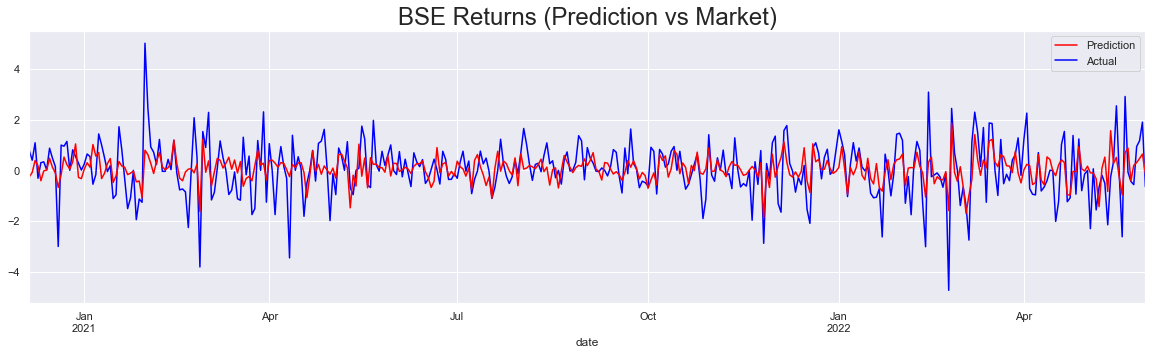

In [16]:
df_test_pred.bse_pred.plot(figsize = (20,5), color = "red", zorder=2, label="Prediction")
df_test_pred.bse_target.plot(color = "blue", zorder = 1, label="Actual")
plt.title("BSE Returns (Prediction vs Market)", size = 24)
plt.legend()
plt.show()

6 - Training and Testing Model - Volatility

In [17]:
# train_date = "01-06-2021"
# df_train, df_test = df.loc[:train_date], df.loc[train_date:]

In [18]:
df_train

,bse,spx,ftse,dax,nikkei
date,,,,,
2000-01-05,-2.440530,0.192218,-1.950224,-1.288614,-2.422312
2000-01-06,1.204588,0.095568,-1.357115,-0.417558,-2.018499
2000-01-07,-0.130033,2.709040,0.893405,4.726546,0.138377
2000-01-10,1.919116,1.118997,1.581915,2.131852,0.000000
2000-01-11,-4.024549,-1.306251,-1.343891,-0.494837,3.614000
...,...,...,...,...,...
2020-12-01,1.145472,1.127119,1.891098,0.685716,1.338901
2020-12-02,-0.083758,0.179117,1.232630,-0.516052,0.050178
2020-12-03,0.032743,-0.062416,0.416188,-0.453533,0.031300


In [19]:
df_test

,bse,spx,ftse,dax,nikkei
date,,,,,
2020-12-07,0.770678,-0.193564,0.079382,-0.210242,-0.761837
2020-12-08,0.399637,0.278715,0.051864,0.056441,-0.302701
2020-12-09,1.085298,-0.794920,0.083857,0.465185,1.325644
2020-12-10,-0.311519,-0.128511,0.540804,-0.333796,-0.230067
2020-12-11,0.302727,-0.126500,-0.803055,-1.364578,-0.387651
...,...,...,...,...,...
2022-05-25,-0.561208,0.945076,0.513066,0.633486,-0.262971
2022-05-26,0.936328,1.988326,0.559633,1.594528,-0.273489
2022-05-27,1.165160,2.474226,0.272312,1.622484,0.664691


In [20]:
# Train the model from start_date to train_date
model_garch = arch_model(df_train.bse, vol = "GARCH", p = 1, q = 1, mean = "Zero", dist = "Normal")
result_garch = model_garch.fit(first_obs=start_date, last_obs=train_date, update_freq=5)

Iteration:      5,   Func. Count:     27,   Neg. LLF: 8614.972714706906
Iteration:     10,   Func. Count:     50,   Neg. LLF: 8608.097945985413
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8608.097945430942
            Iterations: 11
            Function evaluations: 54
            Gradient evaluations: 11


In [21]:
result_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                    bse   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8608.10
Distribution:                  Normal   AIC:                           17222.2
Method:            Maximum Likelihood   BIC:                           17242.0
                                        No. Observations:                 5458
Date:                Wed, Jun 29 2022   Df Residuals:                     5458
Time:                        13:48:00   Df Model:                            0
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0218  5.888e-03      3.707  2.100e-04 [1.028e-02,3.336e-02]
alpha[1]       0.0970  1.213e-02      7.997  1.273e-15   [7.324e-02,  0.121]
beta[1]        0.8939  1.261e-02     70.901      0.000     [  0.869,  0.919]
============================================================================

Covariance estimator: robust
"""

In [22]:
# Predicting Volatility from train_date to end_date
pred_days = 542
df_test_pred = result_garch.forecast(horizon = pred_days, reindex=True)

In [23]:
df_test_pred.variance[-1:].T

date,2020-12-07
h.001,0.883109
h.002,0.896919
h.003,0.910605
h.004,0.924166
h.005,0.937603
...,...
h.538,2.393556
h.539,2.393660
h.540,2.393762
h.541,2.393864


In [24]:
# Step By Step Procedure In Forecasting

pred_vol = pd.DataFrame(df_test_pred.residual_variance[-1:].T)
pred_vol = pred_vol.reset_index(drop=True)
pred_vol['Date'] = "2020-12-05"
pred_vol['Days'] = range(1, 1+len(pred_vol))
pred_vol['Date'] = pd.to_datetime(pred_vol['Date'])
pred_vol['Date'] = pred_vol['Date'] + pd.to_timedelta(pred_vol['Days'], unit='d')
pred_vol = pred_vol.drop(["Days"], axis=1)
pred_vol = pred_vol.set_index('Date')
pred_vol.index.name = "Date"
pred_vol.columns = ['Volatility']
pred_vol = pred_vol.asfreq('b')
pred_vol

,Volatility
Date,
2020-12-07,0.896919
2020-12-08,0.910605
2020-12-09,0.924166
2020-12-10,0.937603
2020-12-11,0.950919
...,...
2022-05-25,2.393347
2022-05-26,2.393452
2022-05-27,2.393556


In [25]:
df_test.bse.abs()

date
2020-12-07    0.770678
2020-12-08    0.399637
2020-12-09    1.085298
2020-12-10    0.311519
2020-12-11    0.302727
                ...   
2022-05-25    0.561208
2022-05-26    0.936328
2022-05-27    1.165160
2022-05-30    1.896847
2022-05-31    0.642509
Name: bse, Length: 387, dtype: float64

In [26]:
pred_vol['Returns'] = df_test.bse.abs()
pred_vol

,Volatility,Returns
Date,,
2020-12-07,0.896919,0.770678
2020-12-08,0.910605,0.399637
2020-12-09,0.924166,1.085298
2020-12-10,0.937603,0.311519
2020-12-11,0.950919,0.302727
...,...,...
2022-05-25,2.393347,0.561208
2022-05-26,2.393452,0.936328
2022-05-27,2.393556,1.165160


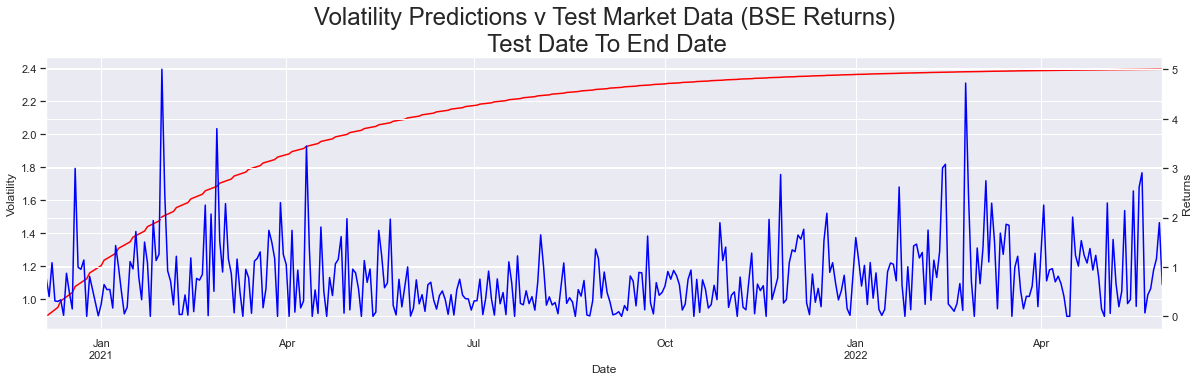

In [27]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title("Volatility Predictions v Test Market Data (BSE Returns)\n Test Date To End Date", size=24)
ax2 = ax.twinx()
pred_vol.Volatility.plot(x="Date", y="Volatility", ax=ax, color="red", label="Volatility")
pred_vol.Returns.plot(x="Date", y="Returns", ax=ax2, color="blue", label="Returns")
ax.set_ylabel("Volatility")
ax2.set_ylabel("Returns")
plt.show()

8 - Predictions - Volatility

In [28]:
# horizon = 100 => 100 days after end date
pred_garch = result_garch.forecast(horizon = 100, reindex=True)

In [29]:
pred_vol = pd.DataFrame(pred_garch.residual_variance[-1:].T)
pred_vol

date,2020-12-07
h.001,0.883109
h.002,0.896919
h.003,0.910605
h.004,0.924166
h.005,0.937603
...,...
h.096,1.764846
h.097,1.770655
h.098,1.776411
h.099,1.782115


In [30]:
pred_vol = pred_vol.reset_index(drop=True)
pred_vol

date,2020-12-07
0,0.883109
1,0.896919
2,0.910605
3,0.924166
4,0.937603
...,...
95,1.764846
96,1.770655
97,1.776411
98,1.782115


In [31]:
pred_vol['Date'] = "2022-05-31"
pred_vol['Days'] = range(1, 1+len(pred_vol))
pred_vol

date,2020-12-07 00:00:00,Date,Days
0,0.883109,2022-05-31,1
1,0.896919,2022-05-31,2
2,0.910605,2022-05-31,3
3,0.924166,2022-05-31,4
4,0.937603,2022-05-31,5
...,...,...,...
95,1.764846,2022-05-31,96
96,1.770655,2022-05-31,97
97,1.776411,2022-05-31,98
98,1.782115,2022-05-31,99


In [32]:
pred_vol['Date'] = pd.to_datetime(pred_vol['Date'])
pred_vol['Date'] = pred_vol['Date'] + pd.to_timedelta(pred_vol['Days'], unit='d')
pred_vol

date,2020-12-07 00:00:00,Date,Days
0,0.883109,2022-06-01,1
1,0.896919,2022-06-02,2
2,0.910605,2022-06-03,3
3,0.924166,2022-06-04,4
4,0.937603,2022-06-05,5
...,...,...,...
95,1.764846,2022-09-04,96
96,1.770655,2022-09-05,97
97,1.776411,2022-09-06,98
98,1.782115,2022-09-07,99


In [33]:
pred_vol = pred_vol.drop(["Days"], axis=1)
pred_vol = pred_vol.set_index('Date')
pred_vol

date,2020-12-07 00:00:00
Date,
2022-06-01,0.883109
2022-06-02,0.896919
2022-06-03,0.910605
2022-06-04,0.924166
2022-06-05,0.937603
...,...
2022-09-04,1.764846
2022-09-05,1.770655
2022-09-06,1.776411


In [34]:
pred_vol.index.name = "Date"
pred_vol.columns = ['Volatility']
pred_vol

,Volatility
Date,
2022-06-01,0.883109
2022-06-02,0.896919
2022-06-03,0.910605
2022-06-04,0.924166
2022-06-05,0.937603
...,...
2022-09-04,1.764846
2022-09-05,1.770655
2022-09-06,1.776411


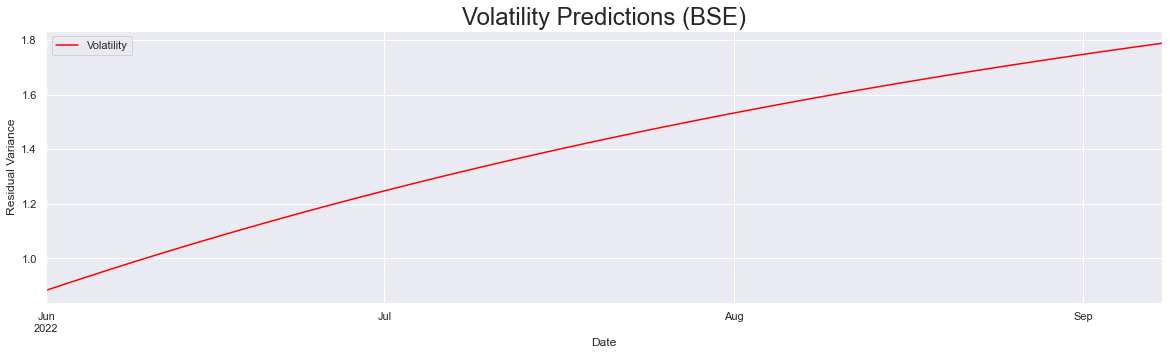

In [35]:
pred_vol.plot(figsize=(20, 5), color="red", zorder=2, label="Volatility")
plt.title("Volatility Predictions (BSE)", size=24)
plt.ylabel("Residual Variance")
plt.legend()
plt.show()